In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
file_path = r'C:\Users\SPANDANA PRIYA\Downloads\Kerala_csv_file.csv'
data = pd.read_csv(file_path)

In [21]:
data['College_Fees'] = data['College_Fees'].str.replace(',', '').astype(float)

In [22]:
print("Dataset Info:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name_of_the_College  99 non-null     object 
 1   College_Location     99 non-null     object 
 2   College_Ownership    99 non-null     object 
 3   College_Rating       99 non-null     float64
 4   College_Fees         99 non-null     float64
dtypes: float64(2), object(3)
memory usage: 4.0+ KB
None

First few rows of the dataset:
                                 Name_of_the_College  \
0                                  Kerala University   
1                                              CUSAT   
2                                 Calicut University   
3                                        NIT Calicut   
4  RSET - Rajagiri School of Engineering and Tech...   

             College_Location College_Ownership  College_Rating  College_Fees  
0  Thiruvananthapuram, Keral

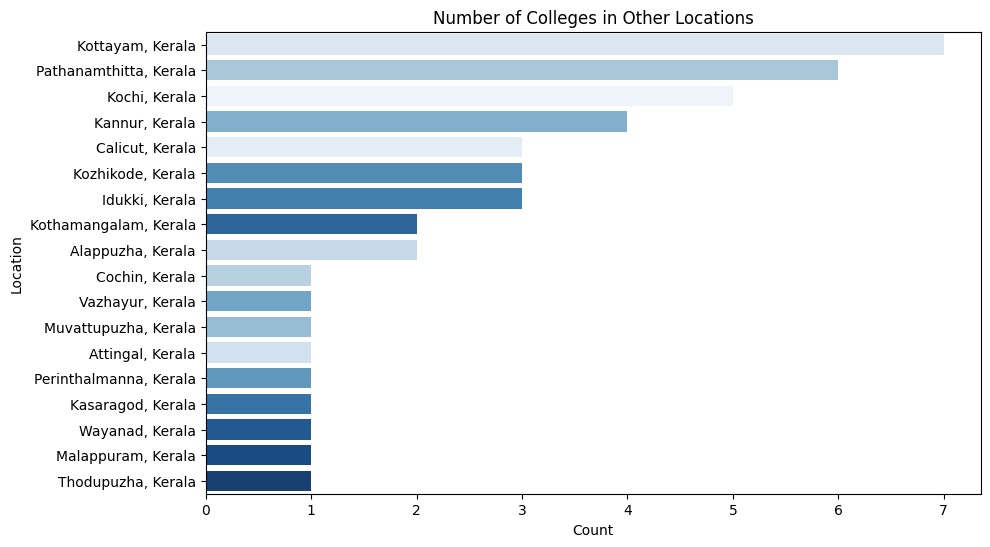

In [23]:
top_locations = data['College_Location'].value_counts().head(5).index
other_locations = data[~data['College_Location'].isin(top_locations)]

plt.figure(figsize=(10, 6))
sns.countplot(y='College_Location',data=other_locations,hue='College_Location',palette='Blues',order=other_locations['College_Location'].value_counts().index,legend=False)

plt.title('Number of Colleges in Other Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

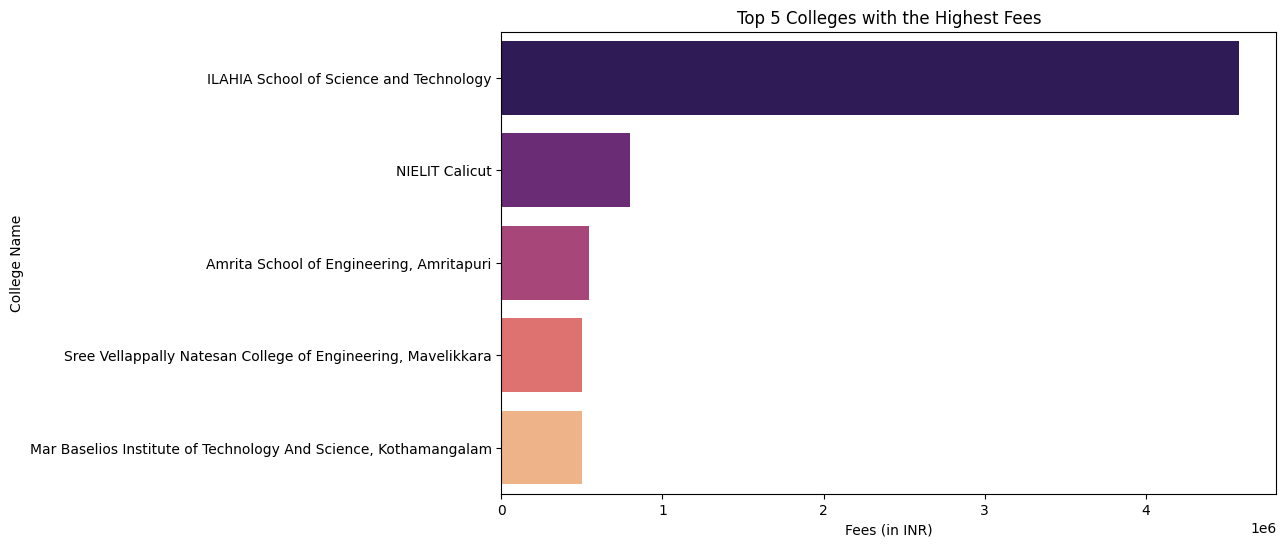

In [24]:
top_fees = data.nlargest(5, 'College_Fees')
plt.figure(figsize=(10, 6))
sns.barplot(x='College_Fees', y='Name_of_the_College', data=top_fees, hue='Name_of_the_College', palette='magma',legend=False)

plt.title('Top 5 Colleges with the Highest Fees')
plt.xlabel('Fees (in INR)')
plt.ylabel('College Name')
plt.show()


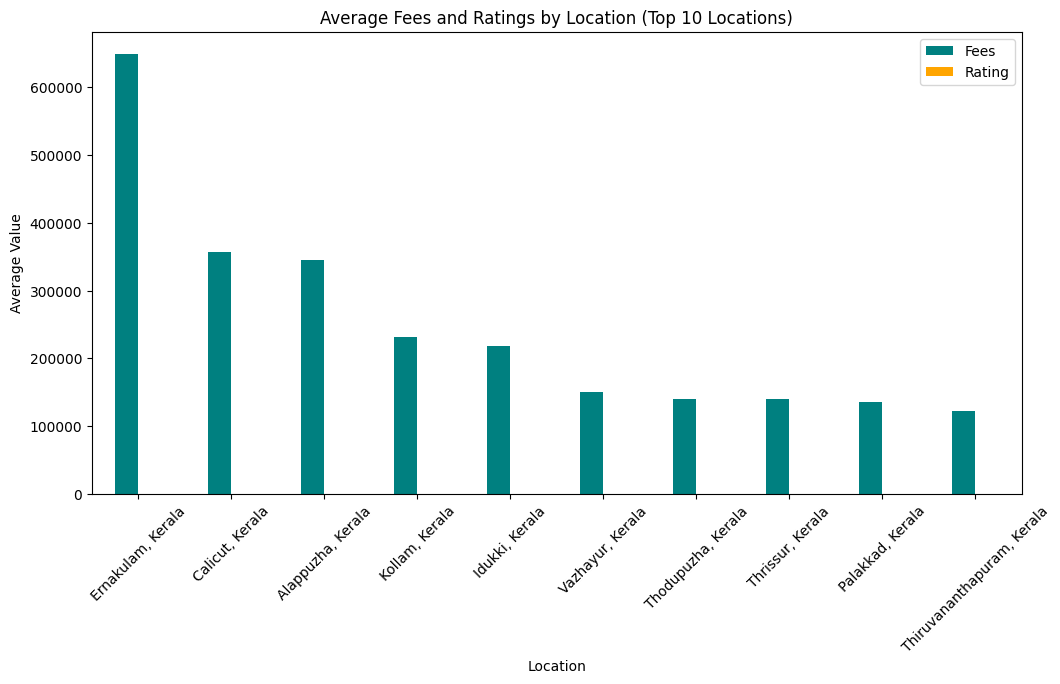

In [25]:
avg_metrics = data.groupby('College_Location')[['College_Fees', 'College_Rating']].mean().sort_values('College_Fees', ascending=False).head(10)
avg_metrics.plot(kind='bar', figsize=(12, 6), color=['teal', 'orange'])
plt.title('Average Fees and Ratings by Location (Top 10 Locations)')
plt.xlabel('Location')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(['Fees', 'Rating'])
plt.show()

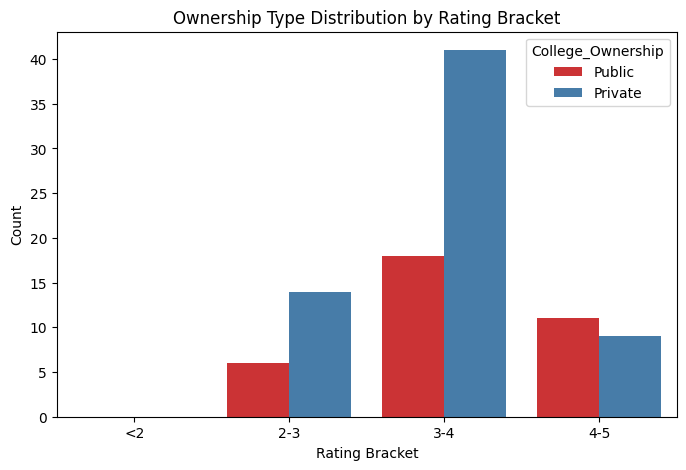

In [26]:
bins = [0, 2, 3, 4, 5]
labels = ['<2', '2-3', '3-4', '4-5']
data['Rating_Bracket'] = pd.cut(data['College_Rating'], bins=bins, labels=labels)
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating_Bracket', hue='College_Ownership', data=data, palette='Set1')
plt.title('Ownership Type Distribution by Rating Bracket')
plt.xlabel('Rating Bracket')
plt.ylabel('Count')
plt.show()

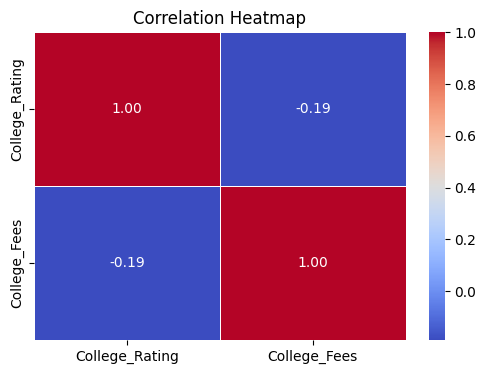

In [27]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


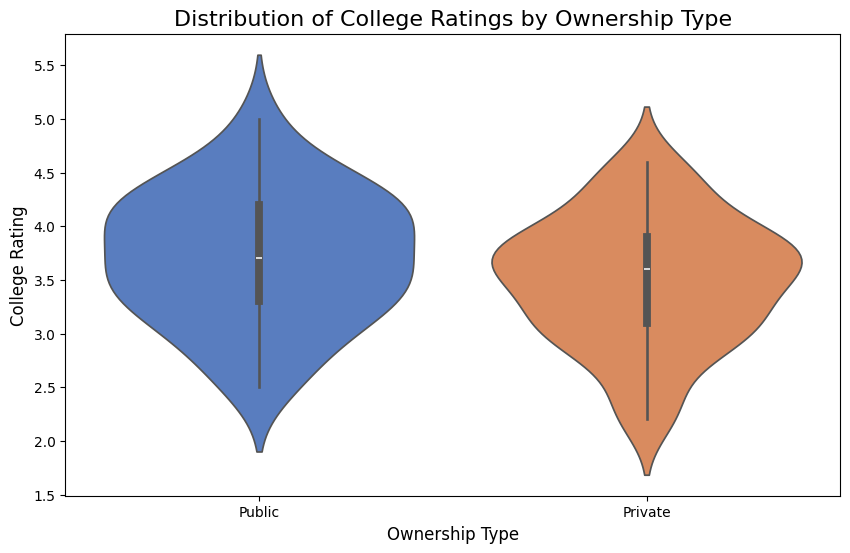

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='College_Ownership', y='College_Rating', data=data, hue='College_Ownership', palette='muted', dodge=False, legend=False)
plt.title("Distribution of College Ratings by Ownership Type", fontsize=16)
plt.xlabel("Ownership Type", fontsize=12)
plt.ylabel("College Rating", fontsize=12)
plt.show()


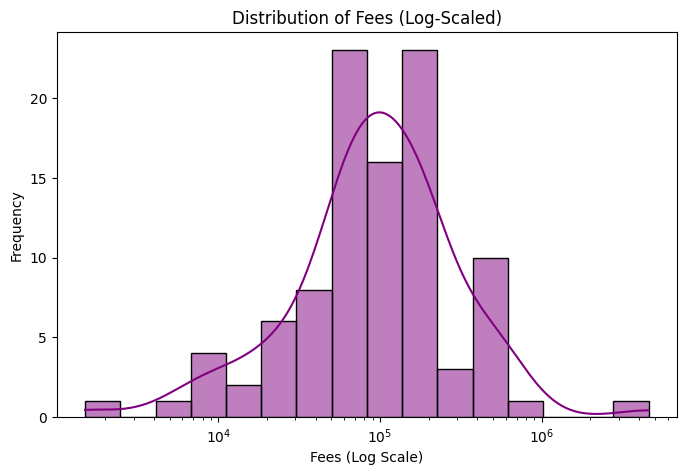

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(data['College_Fees'], kde=True, color='purple', log_scale=True)
plt.title('Distribution of Fees (Log-Scaled)')
plt.xlabel('Fees (Log Scale)')
plt.ylabel('Frequency')
plt.show()

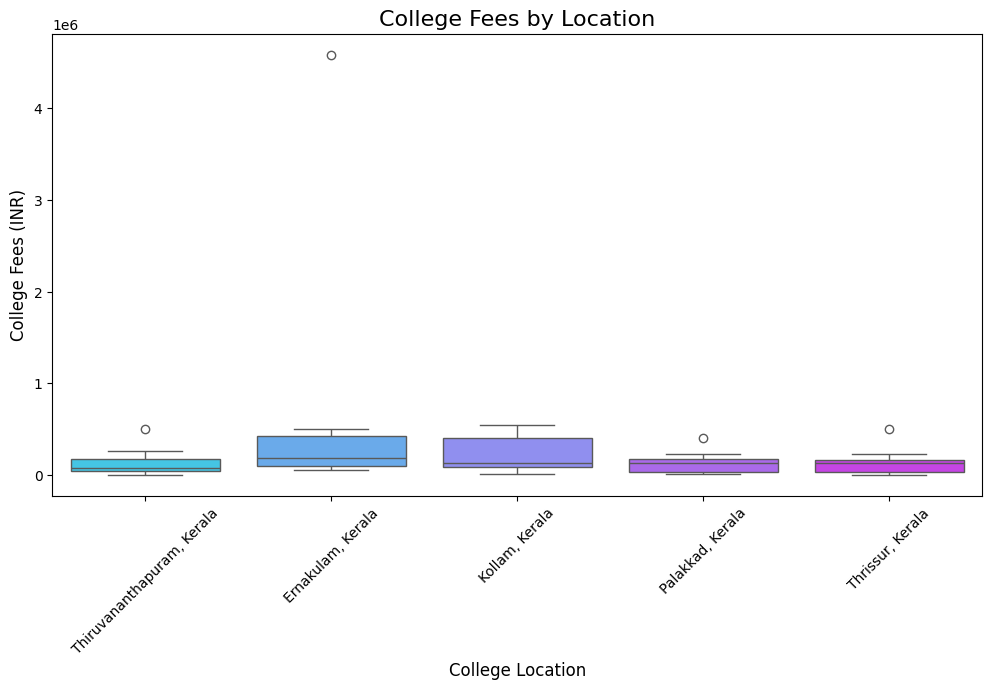

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='College_Location', y='College_Fees', data=filtered_data, hue='College_Location', palette='cool', dodge=False, legend=False)
plt.title("College Fees by Location", fontsize=16)
plt.xlabel("College Location", fontsize=12)
plt.ylabel("College Fees (INR)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


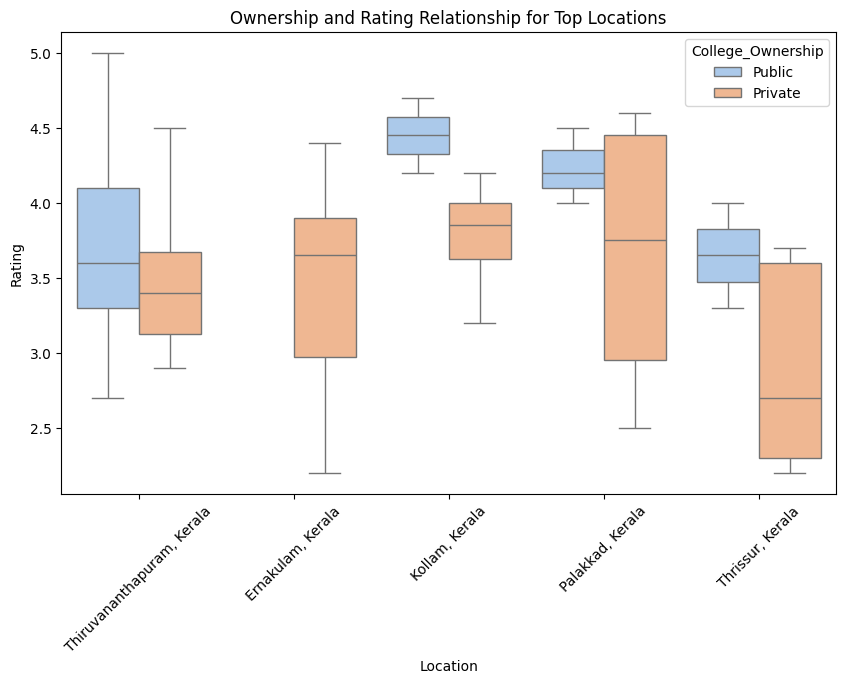

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='College_Location', y='College_Rating', hue='College_Ownership', data=filtered_data, palette='pastel')
plt.title('Ownership and Rating Relationship for Top Locations')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

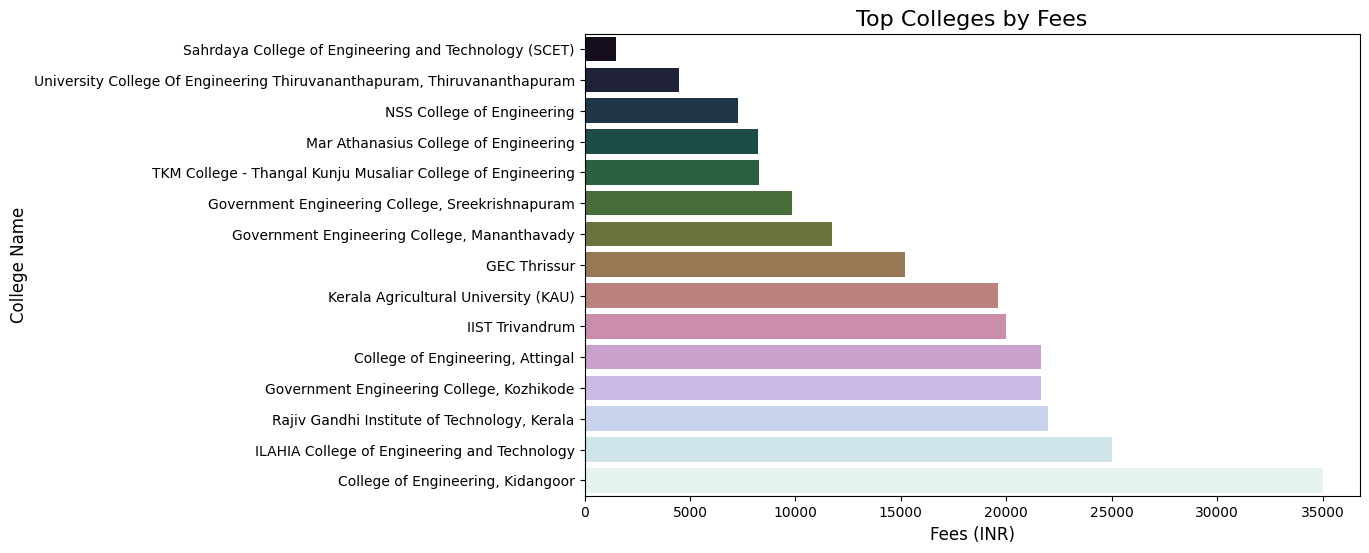

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='College_Fees', y='Name_of_the_College', data=sorted_fees, hue='Name_of_the_College', dodge=False, palette='cubehelix', legend=False)
plt.title('Top Colleges by Fees', fontsize=16)
plt.xlabel('Fees (INR)', fontsize=12)
plt.ylabel('College Name', fontsize=12)
plt.show()
